## Calculating the flux of a vector field across a hemisphere

In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az

Consider the vector field $\textbf{F}(x, y, z) = x \textbf{i} + y \textbf{j} + z \textbf{k}$. We want to study the distribution of the total flux $ \Phi $ of this vector field across the **upper hemisphere** $S$ of a sphere of radius $a$. The flux $\Phi$ is given as:
$$
\Phi = \int \int_S \textbf{F} \cdot d \textbf{S}
$$

### Solution

Let us parametrize the surface as:
$$
r(\theta, \phi) = a \sin(\theta) \sin(\phi) \textbf{i} + a \cos(\theta) \sin(\phi) \textbf{j} + a \cos(\phi) \textbf{k}
$$

The normal to the surface $S$ is:
$$
r_\theta \times r_\phi = a^2 \sin \theta \sin^2\phi \textbf{i} + a^2 \cos \theta \sin^2 \phi \textbf{j} + a^2 \sin \phi \cos \phi \textbf{k}
$$

Therefore, the flux $\Phi$ is:
$$
\begin{aligned}
\Phi & = \int \int_S \textbf{F} \cdot d \textbf{S} \\
& = \int_0^{2 \pi} \int_0 ^{\frac{\pi}{2}} a ^2 \sin \phi \, d \phi \, d \theta \\
\therefore \Phi & = 2 \pi a ^3
\end{aligned}
$$

## Problem 2:
Let the radius of the hemisphere, $A$, be a random variable that is normally distributed with mean 4 and standard deviation of 0.2.

### Part A:
Because $\Phi = 2 \pi A^3$ is a non-linear transformation, the exact expected value and variance will be complex. Use the delta method to provide good approximations for the mean and variance of the flux across the hemisphere.

In [ ]:
# to find the mean flux, simply calculate the mean radius and plug it into the formula for the flux:
A_dist = ss.norm(loc=4, scale=0.2)

mean_radius = A_dist.mean()

In [ ]:
sampled_radii = A_dist.rvs(size=100_000)
sampled_flux = 2 * np.pi * sampled_radii**3

In [7]:
# delta method
approx_mean = 2 * np.pi * (mean_radius**3)
approx_variance = A_dist.var() * (6 * np.pi * A_dist.mean() ** 2) ** 2

print(approx_mean)
print(approx_variance)
print(np.sqrt(approx_variance))

402.1238596594935
3638.3309664175817
60.318578948924035


In [8]:
print(np.mean(sampled_flux))
print(np.var(sampled_flux))
print(np.std(sampled_flux))

405.1939277124311
3677.1134466152866
60.63920717337329


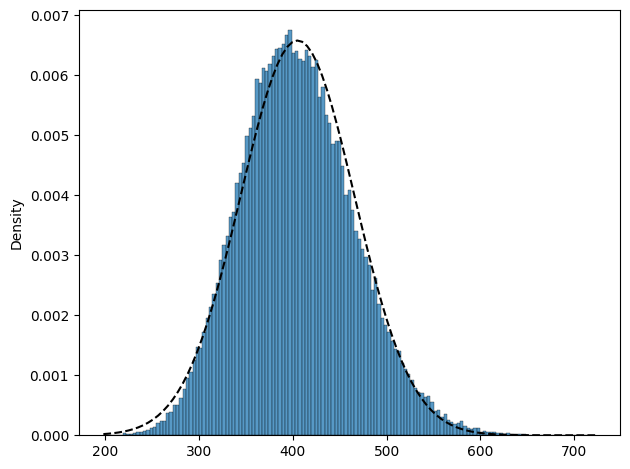

In [ ]:
xx = np.linspace(np.min(sampled_flux), np.max(sampled_flux), 100)
yy = ss.norm(loc=np.mean(sampled_flux), scale=np.std(sampled_flux)).pdf(xx)

sns.histplot(x=sampled_flux, stat="density")
plt.plot(xx, yy, color="black", linestyle="--")

plt.tight_layout()
plt.show()

In [ ]:
with pm.Model() as model:
    radius = pm.Normal("radius", mu=4, sigma=0.2)
    flux = pm.Deterministic("flux", 2 * np.pi * radius**3)

    trace = pm.sample(10_000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [radius]


Output()

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 4 seconds.


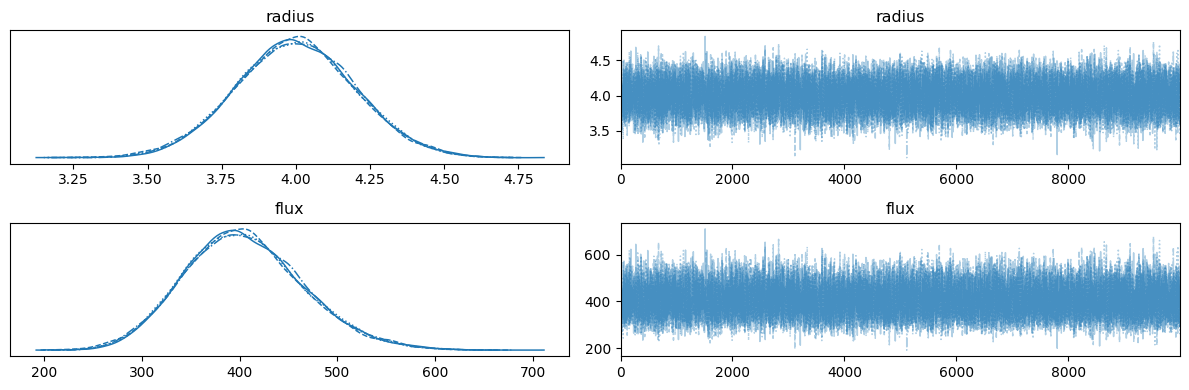

In [18]:
az.plot_trace(trace)
plt.tight_layout()
plt.show()

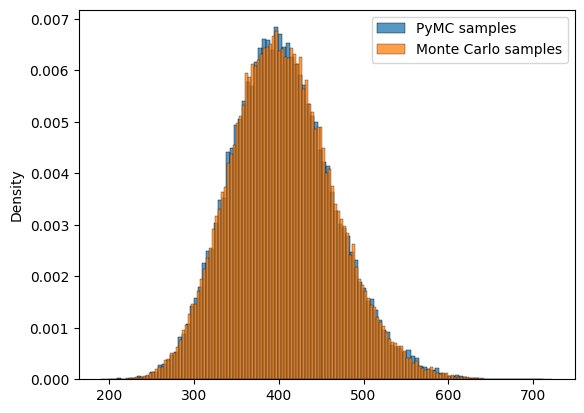

In [ ]:
sns.histplot(
    x=trace.posterior["flux"].values.reshape(-1),
    label="PyMC samples",
    stat="density",
)

sns.histplot(sampled_flux, label="Monte Carlo samples", stat="density")

plt.legend()
plt.show()